# New York Citi Bikes Data Analysis

<p style="text-align:center;"><img src="https://th.bing.com/th/id/OIP.JYRXXsKikmQfIgKVUAXRzAHaF7?rs=1&pid=ImgDetMain" width=700 height=700></p>

## Table of Contents

* <b> 1. [Importing Packages](#1-importing-packages)
* <b> 2. [Data collection and Description](#2-Data-collection-and-Description)
    * 2.1. [Data Collection](#21-data-collection)
    * 2.2. [Data Description](#22-data-description)
* <b> 3. [Loading Data](#3-loading-data)
* <b> 4. [Data Cleaning and filtering](#4-data-cleaning-and-filtering)
    * 4.1. [Checking for Missing Values](#41-checking-for-missing-values)
    * 4.2. [Checking for Duplicated Rows](#42-checking-for-duplicated-rows)
    * 4.3. [Checking for Outliers](#42-checking-for-outliers)
* <b> 5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
    * 5.1. [Distribution Graph](#51-Distribution-graph)
    * 5.2. [Line Graph](#52-line-graph)
    * 5.2. [Bar Graph](#53-bar-graph)
    * 5.2. [Bar Plot](#54-bar-plot)
    * 5.2. [Scatter Plot](#55-scatter-plot)
    * 5.2. [Box Plot](#56-box-plot)
* <b> 6. [Data Preprocessing](#6-data-preprocessing)
* <b> 7. [Modeling](#7-modeling)
* <b> 8. [Evaluation and Validation](#8-evaluation-and-validation)
* <b> 9. [Final Model](#9-final-model)
* <b> 10. [Conclusion and Future Work](#10-conclusion-and-future-work)
* <b> 11. [References](#11-References)
    

# 1. Importing Packages
<a class = "anchor" id="1-importing-packages"></a>

In [2]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations and handling arrays
import numpy as np

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing matplotlib for plotting graphs and charts
import matplotlib.pyplot as plt

# Importing metrics from sklearn for evaluating model performance
from sklearn import metrics

# Import the scaling module
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Importing necessary NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Importing string for string operations
import string

# Importing LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Importing models for text classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Importing regular expressions module
import re

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# 2. Data collection and Description
<a class = "anchor" id="2-Data collection and Description"></a>

### 2.1 Data Collection
<a class = "anchor" id=#21-data-collection></a>

This data used in this dataset has been sourced from the official Citi Bike system data, which is publicly available and can be accessed at Citi Bike System Data. The dataset includes monthly CSV files that have been combined and preprocessed to create a unified dataset for the entire year of 2023.The data was modified and collected from Kaggle

### 2.2 Data Description
<a class = "anchor" id=#22-data-description></a>



The dataset used is that on bikes rented from a start station with a specific code number to an end station with a different specific code number. The trip durations are also recoded, the seasons, dates and months.

# 3. Loading Data
<a class = "anchor" id="3-loading-data"></a>

##### The data used for this project is located in the NYC Citi Bikes_Raw Data.csv file. 

This file is loaded into a Pandas DataFrame (called df) using the pd.read_csv() function. This function reads the CSV file and converts it into a DataFrame for further manipulation and analysis. We then use the `.head()` function to visualize the first few rows and gain an understanding of the data contained within the DataFrame.

In [3]:
import pandas as pd

# Load the dataset
NYC_Bikes_df = pd.read_csv("NYC Citi Bikes_Raw Data - NYCitiBikes.csv")

# Display the first few rows
NYC_Bikes_df.head()

Start Time       Stop Time  Start Station ID Start Station Name  \
0  01-01-17 00:38    1-1-17 01:03              3194    McGinley Square   
1  01-01-17 01:47  01-01-17 01:58              3183     Exchange Place   
2  01-01-17 01:47  01-01-17 01:58              3183     Exchange Place   
3  01-01-17 01:56  01-01-17 02:00              3186      Grove St PATH   
4    1-1-17 02:12  01-01-17 02:23              3270    Jersey & 6th St   

   End Station ID     End Station Name  Bike ID   User Type  Birth Year  Age  \
0            3271  Danforth Light Rail    24668  Subscriber        1961   60   
1            3203        Hamilton Park    26167  Subscriber        1993   28   
2            3203        Hamilton Park    26167  Subscriber        1993   28   
3            3270      Jersey & 6th St    24604  Subscriber        1970   51   
4            3206              Hilltop    24641  Subscriber        1978   43   

  Age Groups  Trip Duration Trip_Duration_in_min  Month  Season  Temperature  \
0      55-64           1513                   25      1  Winter           10   
1      25-34            639                   11      1  Winter           10   
2      25-34            639                   11      1  Winter           10   
3      45-54            258                    4      1  Winter           10   
4      35-44            663                   11      1  Winter           10   

  Weekday  
0  Sunday  
1  Sunday  
2  Sunday  
3  Sunday  
4  Sunday

In [3]:
# Displays the number of rows and columns
NYC_Bikes_df.shape

(20400, 17)

**Results** : The NYC Citi Bikes dataset consists of 20400 rows (observations) and 17 columns (features). 

In [4]:
## Display summary information about the DataFrame.
NYC_Bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Time            20400 non-null  object
 1   Stop Time             20400 non-null  object
 2   Start Station ID      20400 non-null  int64 
 3   Start Station Name    20400 non-null  object
 4   End Station ID        20400 non-null  int64 
 5   End Station Name      20399 non-null  object
 6   Bike ID               20400 non-null  int64 
 7   User Type             20400 non-null  object
 8   Birth Year            20400 non-null  int64 
 9   Age                   20400 non-null  int64 
 10  Age Groups            20400 non-null  object
 11  Trip Duration         20400 non-null  int64 
 12  Trip_Duration_in_min  20400 non-null  object
 13  Month                 20400 non-null  int64 
 14  Season                20400 non-null  object
 15  Temperature           20400 non-null

# 4. Data cleaning and filtering
<a class = "anchor" id="4-data-cleaning-and-filtering"></a>

### 4.1.Checking for Missing Values
<a class = "anchor" id=#41-checking-for-missing-values></a>

In [5]:
def check_null_values(df):

    print("Columns that contain Null/NaN values:")
    for col in df.columns:                  # for each column in the DataFrame
        null_count = df[col].isnull().sum() # calculate the sum of the null values
        if null_count > 0:
            print(f"{col}: {null_count}")

NYC_Bikes_df.isnull().sum()         

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

In [6]:
NYC_Bikes_df[NYC_Bikes_df["End Station Name"].isna()==1]

Start Time      Stop Time  Start Station ID Start Station Name  \
9858  25-02-17 12:36  25-2-17 12:44              3220  5 Corners Library   

      End Station ID End Station Name  Bike ID   User Type  Birth Year  Age  \
9858            3211              NaN    24522  Subscriber        1963   58   

     Age Groups  Trip Duration Trip_Duration_in_min  Month  Season  \
9858      55-64            532                    9      2  Winter   

      Temperature   Weekday  
9858           11  Saturday

Only "End Station Name" contains a Null/NaN value

In [20]:
NYC_Bikes_df["End Station Name"] = NYC_Bikes_df["End Station Name"].fillna(0)

# Checking for null values
check_null_values(NYC_Bikes_df)

Columns that contain Null/NaN values:


### 4.2.Checking for Duplicated Rows
<a class = "anchor" id=#41-checking-for-duplicated-rows></a>

In [21]:
NYC_Bikes_df.duplicated("Start Time")

0        False
1        False
2         True
3        False
4        False
         ...  
20395     True
20396    False
20397     True
20398    False
20399    False
Length: 20400, dtype: bool

In [22]:
NYC_Bikes_df.drop_duplicates()

Start Time       Stop Time  Start Station ID Start Station Name  \
0      01-01-17 00:38    1-1-17 01:03              3194    McGinley Square   
1      01-01-17 01:47  01-01-17 01:58              3183     Exchange Place   
3      01-01-17 01:56  01-01-17 02:00              3186      Grove St PATH   
4        1-1-17 02:12  01-01-17 02:23              3270    Jersey & 6th St   
5      01-01-17 02:22    1-1-17 02:31              3212    Christ Hospital   
...               ...             ...               ...                ...   
20393   31-3-17 21:03   31-3-17 21:12              3278   Monmouth and 6th   
20394  31-03-17 21:06  31-03-17 21:10              3186      Grove St PATH   
20396  31-03-17 21:13   31-3-17 21:18              3195            Sip Ave   
20398  31-03-17 21:26  31-03-17 21:30              3195            Sip Ave   
20399   31-3-17 23:20  31-03-17 23:30              3272       Jersey & 3rd   

       End Station ID       End Station Name  Bike ID   User Type  Birth Year  \
0                3271    Danforth Light Rail    24668  Subscriber        1961   
1                3203          Hamilton Park    26167  Subscriber        1993   
3                3270        Jersey & 6th St    24604  Subscriber        1970   
4                3206                Hilltop    24641  Subscriber        1978   
5                3225  Baldwin at Montgomery    24520  Subscriber        1987   
...               ...                    ...      ...         ...         ...   
20393            3278       Monmouth and 6th    26221  Subscriber        1958   
20394            3203          Hamilton Park    24608  Subscriber        1968   
20396            3194        McGinley Square    29219  Subscriber        1956   
20398            3201                 Dey St    29276  Subscriber        1970   
20399            3268         Lafayette Park    24398  Subscriber        1984   

       Age Age Groups  Trip Duration Trip_Duration_in_min  Month  Season  \
0       60      55-64           1513                   25      1  Winter   
1       28      25-34            639                   11      1  Winter   
3       51      45-54            258                    4      1  Winter   
4       43      35-44            663                   11      1  Winter   
5       34      25-34            535                    9      1  Winter   
...    ...        ...            ...                  ...    ...     ...   
20393   63      55-64            577                   10      3  Spring   
20394   53      45-54            244                    4      3  Spring   
20396   65      65-74            264                    4      3  Spring   
20398   51      45-54            239                    4      3  Spring   
20399   37      35-44            618                   10      3  Spring   

       Temperature Weekday  
0               10  Sunday  
1               10  Sunday  
3               10  Sunday  
4               10  Sunday  
5               10  Sunday  
...            ...     ...  
20393           18  Friday  
20394           18  Friday  
20396           18  Friday  
20398           18  Friday  
20399           18  Friday  

[18450 rows x 17 columns]

In [24]:
# Drop duplicates based on all columns
NYC_Bikes_df_unique = NYC_Bikes_df.drop_duplicates()

In [24]:
def count_duplicate_rows(df):
    """
    Count the number of duplicate rows in a pandas DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to be checked for duplicate rows.

    Returns:
    - int: The count of duplicate rows found in the DataFrame.
    """
    duplicate_count = df.duplicated().sum() 
    return duplicate_count

print("Number of duplicate rows:", count_duplicate_rows(NYC_Bikes_df))

Number of duplicate rows: 1950


In [29]:
# Drop duplicated values
df_deduplicated = NYC_Bikes_df.drop_duplicates()

# Display the DataFrame after dropping duplicates
print("\nDataFrame after dropping duplicates:")
print(df_deduplicated)


DataFrame after dropping duplicates:
           Start Time       Stop Time  Start Station ID Start Station Name  \
0      01-01-17 00:38    1-1-17 01:03              3194    McGinley Square   
1      01-01-17 01:47  01-01-17 01:58              3183     Exchange Place   
3      01-01-17 01:56  01-01-17 02:00              3186      Grove St PATH   
4        1-1-17 02:12  01-01-17 02:23              3270    Jersey & 6th St   
5      01-01-17 02:22    1-1-17 02:31              3212    Christ Hospital   
...               ...             ...               ...                ...   
20393   31-3-17 21:03   31-3-17 21:12              3278   Monmouth and 6th   
20394  31-03-17 21:06  31-03-17 21:10              3186      Grove St PATH   
20396  31-03-17 21:13   31-3-17 21:18              3195            Sip Ave   
20398  31-03-17 21:26  31-03-17 21:30              3195            Sip Ave   
20399   31-3-17 23:20  31-03-17 23:30              3272       Jersey & 3rd   

       End Station ID    

### Latest status:  
Our dataset consisted of 1950 duplicated rows and after dropping the duplicated rows, our dataset is left with 18450 rows and 17 columns

### 4.3.Checking for outliers
<a class = "anchor" id=#43-checking-for-outliers></a>

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = NYC_Bikes_df['Trip Duration'].quantile(0.25)
Q3 = NYC_Bikes_df['Trip Duration'].quantile(0.75)
# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers based on the bounds
outliers = NYC_Bikes_df[(NYC_Bikes_df['Trip Duration'] < lower_bound) | (NYC_Bikes_df['Trip Duration'] > upper_bound)]
# Remove outliers (optional)
NYC_bikes_df_no_outliers = NYC_Bikes_df[(NYC_Bikes_df['Trip Duration'] >= lower_bound) & (NYC_Bikes_df['Trip Duration'] <= upper_bound)]

# 5. Exploratory Data Analysis (EDA)
<a class = "anchor" id="5-exploratory-data-analysis-eda)"></a>

### 5.1.Distribution graph
<a class = "anchor" id=#51-distribution-graph></a>

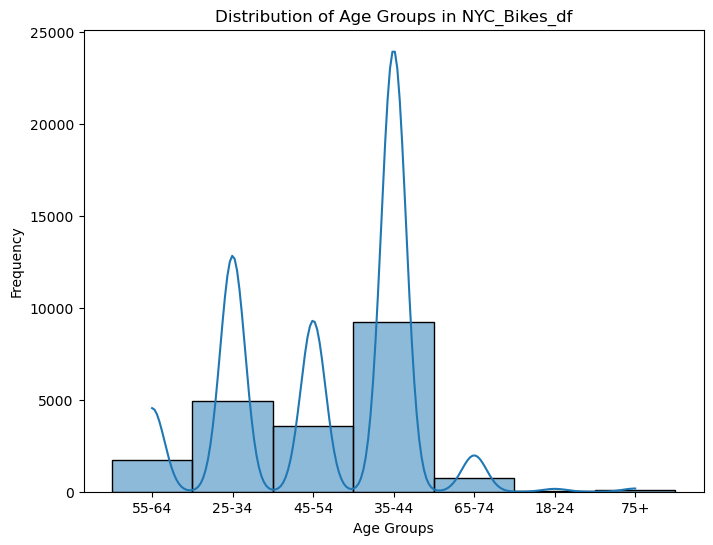

In [4]:
# Distribution plot for Age Groups in the NYC_Bikes dataset
plt.figure(figsize=(8, 6))
sns.histplot(NYC_Bikes_df['Age Groups'], bins=10, kde=True)
plt.title("Distribution of Age Groups in NYC_Bikes_df")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.show()


Distribution-Graph Analysis: The distribution graph has shown that most age group that rents out bikes is known to be 35-44 and the least group to rent out bikes is between 18-24 and 75+

### 5.2.Line Graph
<a class = "anchor" id=#52-line-graph></a>

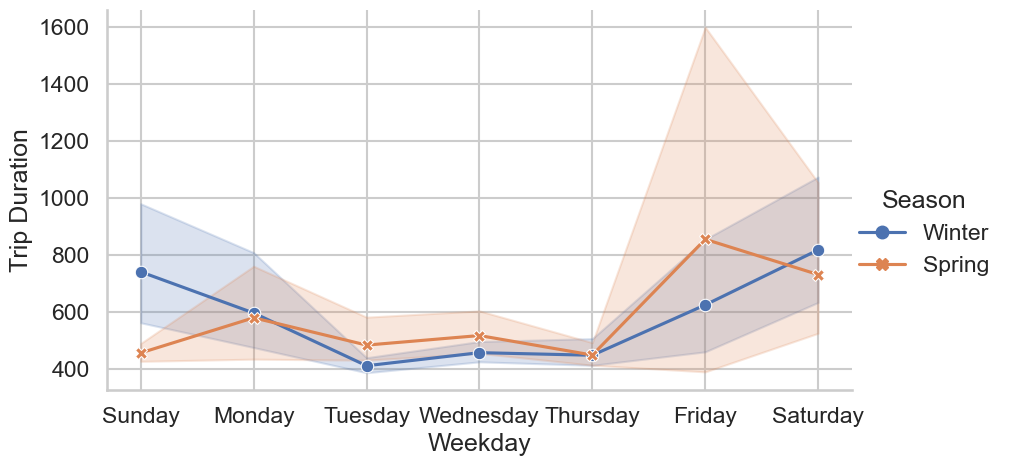

In [154]:
sns.set_style("whitegrid")
sns.relplot(data=NYC_Bikes_df, x="Weekday", y="Trip Duration", kind="line",
            style="Season", hue="Season", dashes=False, markers=True, height=5, aspect=1.8)
plt.title("")
plt.show()

Line-Graph Analysis: The line graph has shown that most bikes are rented on the weekends mostly during Spring time than Winter time.

### 5.3.Bar Graph
<a class = "anchor" id=#53-bar-graph></a>

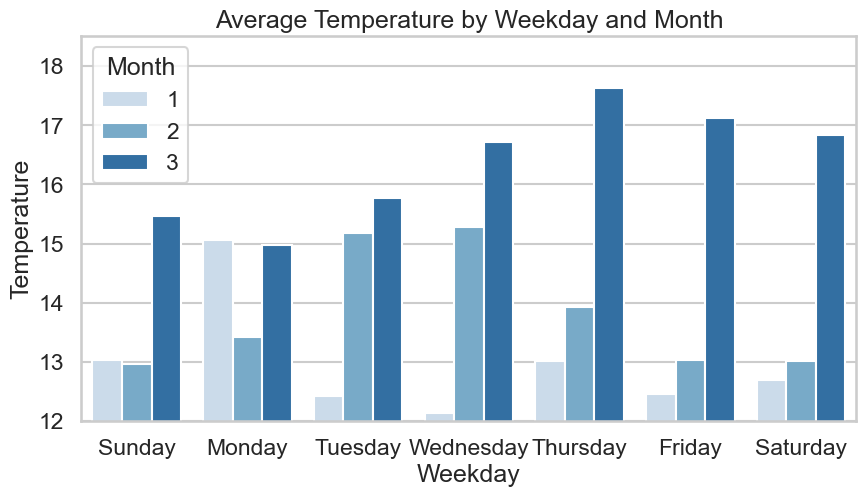

In [128]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Weekday", y="Temperature", hue="Month", ci=None, palette="Blues", data=NYC_Bikes_df)

plt.ylim(12, None)  
plt.xlabel("Weekday")
plt.ylabel("Temperature")
plt.title("Average Temperature by Weekday and Month")


plt.show()


Bar-Graph Analysis: The bar graph has shown that during the first month the highest temperature of bikes rented has been on Monday and lowest on Wednesday. On the second month the highest temperature of bikes rented has been on Wednesday and the lowest on Sunday. On the third month the highest temperature of bikes rented has been on Thursday and the lowest temperature is Monday.

### 5.4.Bar Plot
<a class = "anchor" id=#54-bar-plot></a>

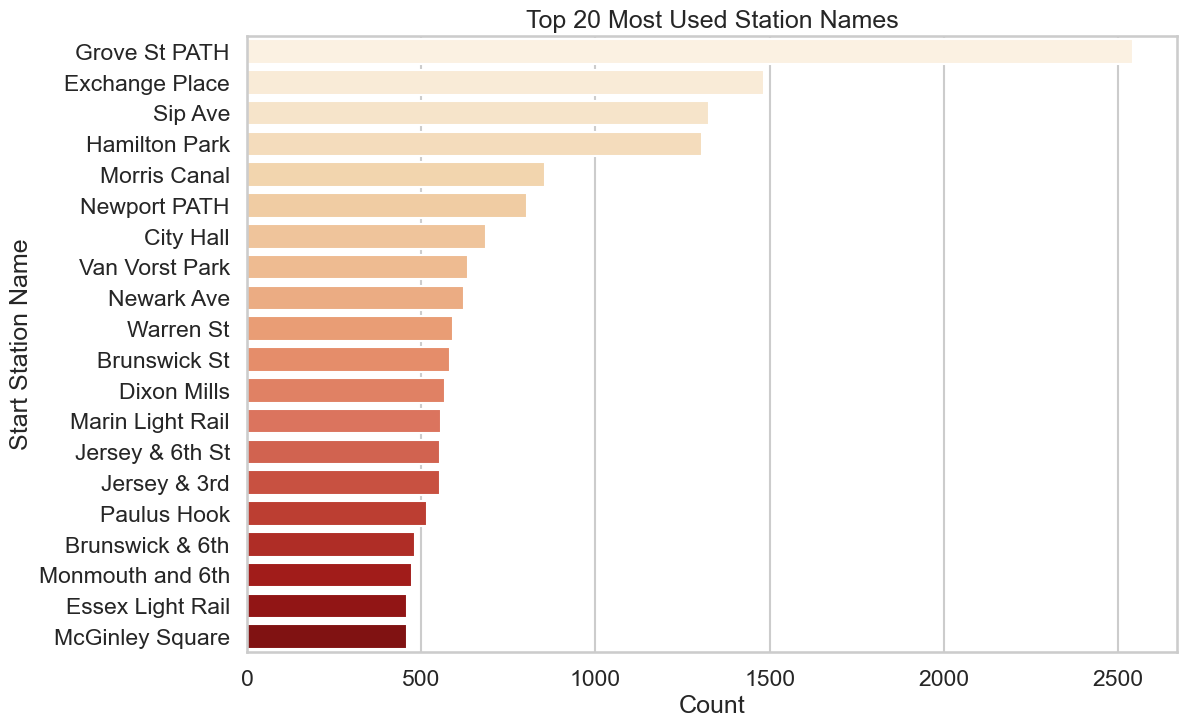

In [160]:
name_counts = NYC_Bikes_df['Start Station Name'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=name_counts.values, y=name_counts.index, palette='OrRd')

plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 20 Most Used Station Names')

plt.show()

Bar-Plot Analysis: The bar plot conducted was for the most used station names. The most used station name is "GROVE ST PATH" and "EXCHANGE PLACE" comes in second while "MCGINLEY SQUARE" is the least used station when renting bikes.

### 5.5.Scatter Plot
<a class = "anchor" id=#55-scatter-plot></a>

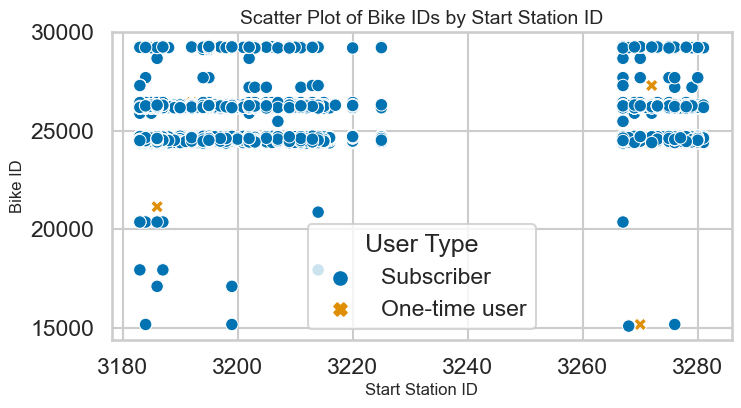

In [148]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x="Start Station ID", 
    y="Bike ID", 
    data=NYC_Bikes_df, 
    hue="User Type",  
    style="User Type", 
    palette="colorblind",)

plt.xlabel("Start Station ID", fontsize=12)
plt.ylabel("Bike ID", fontsize=12)
plt.title("Scatter Plot of Bike IDs by Start Station ID", fontsize=14)

plt.grid(True) 
plt.legend(title="User Type") 

plt.show()


Scatter-Plot Analysis: The scatter plot has shown that the bike id and start station id codes numbers are  usually numbers scattered around the 25000-30000. And Subribers are over dominating as compared to one-time users.

### 5.6.Box Plot
<a class = "anchor" id=#56-box-plot></a>

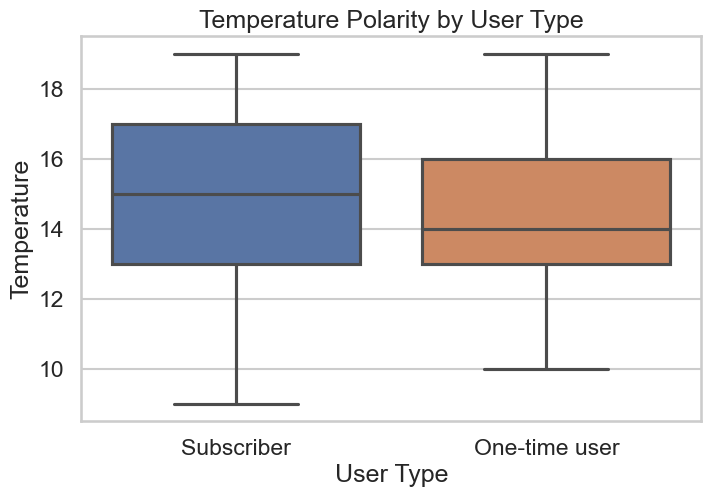

In [159]:
# Temperature analysis by User Type
plt.figure(figsize=(8, 5))
sns.boxplot(NYC_Bikes_df, x='User Type', y='Temperature')
plt.title('Temperature Polarity by User Type')
plt.xticks(rotation=0)
plt.show()

Box-Plot Analysis: Subscribers tend to rent more bikes than one-time users no matter the temperature experienced. 

# 6. Data Preprocessing
<a class = "anchor" id="6-data-preprocessing"></a>

After completing the EDA, the next step is to preprocess the data. This involves splitting the data into training sets, testing sets and scaling the features to help our models perform optimally.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming NYC_Bikes_df is already defined and contains the data

# Select only float64 columns for scaling, excluding the target variable
float_columns = NYC_Bikes_df.select_dtypes(include=['float64']).columns.drop('Trip Duration')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Separate the feature and target variables
X = NYC_Bikes_df.drop(['Trip Duration'], axis=1)
y = NYC_Bikes_df['Trip Duration']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only the float columns for the training set
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit the scaler on the training data and transform
X_train_scaled[float_columns] = scaler.fit_transform(X_train[float_columns])

# Transform the test set with the same scaler
X_test_scaled[float_columns] = scaler.transform(X_test[float_columns])

# Now X_train_scaled and X_test_scaled can be used for model training and evaluation